Some exercises for the problem solving session

Problem from group assignment 1: what is the expected number of coin tosses before the first head appears? Let's say we have computed it and want to check if it is reasonable: use simulation!

In [7]:
import numpy as np



In [12]:
req_attempts = []
trials = 10000

for i in range(trials):
    attempt = 0
    while True:
        head_or_tails = np.random.choice([0,1])
        attempt+=1
        if head_or_tails == 1:
            req_attempts.append(attempt)
            break 

np.mean(req_attempts)

np.float64(2.0076)

In [4]:
# n = 100000
# # store a sequence of required attempts in n trials
# all_req_attempts = np.array([])
# for i in range(n):
#   # required attempts in a current run
#   req_attempts = 0
  
#   while(1):
#     head_or_coin = np.random.choice(2, 1)
#     req_attempts = req_attempts + 1
#     if(head_or_coin == 1):
#       # when we finally got a head, remember the number of attempts
#         all_req_attempts = np.append(all_req_attempts, req_attempts)
#         break


# all_req_attempts.mean()

np.float64(2.00016)

In [14]:
n = 10000 #number of trials

all_req_attempts = np.array([])
for i in range(n):
    req_attempts = 0
    while True:
        heads_or_tails = np.random.choice(2,1)
        req_attempts += 1 
        if(heads_or_tails == 1):
            all_req_attempts = np.append(all_req_attempts, req_attempts)
            break
all_req_attempts.mean()

np.float64(1.9872)

In [24]:

trials = 100
all_req_attempts = []

for i in range(trials):
    attempt = 0
    head_count = 0
    while head_count<2:
        heads_or_tails = np.random.choice([0,1])
        attempt+=1
        if heads_or_tails == 1:
                head_count+=1
    all_req_attempts.append(attempt)
np.mean(all_req_attempts)

np.float64(4.14)

Chapter 1, problem 5

## Problem 5, Chap 1

In [25]:
import numpy as np

In [26]:
# the function returns True if we have obtained 2 heads, say head = 1 and tail = 0
def true_event(sequence):
    # check first if the sequence has 2 heads:
    if (np.sum(sequence) == 2):
        # if yes, check if the last element of the sequence was 1 - then the sequence is correct
        if (sequence[-1] == 1):
            return 1
    # otherwise, we got our number wrong
    return 0

In [17]:
k = 4
# randint (a, b) generates random numbers in [a, b) ! so b is not included
# generate a sequence of outcomes of size k = 4
x = np.random.randint(0,2,size=k)

print(x)
true_event(x)

[1 1 1 1]


0

Now define a function that takes a vector of sequences and for each returns true or false

In [7]:
def true_event_vector(sequence):
    return (np.sum(x,axis=1) == 2)*(x[:,-1] == 1)

In [8]:
k_max = 4

x = np.random.randint(0,2,size=(100000,k))
x

array([[1, 0, 1, 0],
       [1, 1, 1, 1],
       [1, 0, 0, 0],
       ...,
       [1, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 0]])

Empirically compute the probability (the fraction of 1s in the obtained sequence)

In [9]:
np.mean(true_event_vector(x))

0.18838

What is the actual probability that k trials required? Hint: what is the probability of obtaining exactly 1 head in k-1 trials?

In [10]:
p = 1/2
(k-1)*((1-p)**(k-2)*p)*p

0.1875

## Problem 10, Chap 1

In [307]:
import numpy as np

In [11]:
# the door can take values 1, 2, 3
door = np.random.randint(1,4,size=100000)

print(door)
#print(door)
# we pick the 1st door 
np.mean(door == 1) # Probability of getting a price when not switching

[1 1 1 ... 1 2 1]


0.33513

Now let's compute the probability of changing to another door

In [12]:
from random import randint
host = [] # Door opened by host
for d in door:
    if (d == 1):
        # Randomly open either 2 or 3
        host.append(randint(2,3))
    elif (d == 2):
        host.append(3)
    elif (d == 3):
        host.append(2)

In [14]:
switch_success = [] # If switching was a success
for d,h in zip(door,host):
    if (h == 2) and d==3: # Switching from 1 to 3 was a success
        switch_success.append(1)
    elif (h == 3) and d==2: # Switching from 1 to 2 was a success
        switch_success.append(1)
    else:
        switch_success.append(0)

In [15]:
np.mean(switch_success)

0.66487

Problem from group assignment 1: What is the CDF and PDF of R = sqrt(X^2 + Y^2) where X and Y are uniformly distributed on a unit disc. Let's simulate the points first

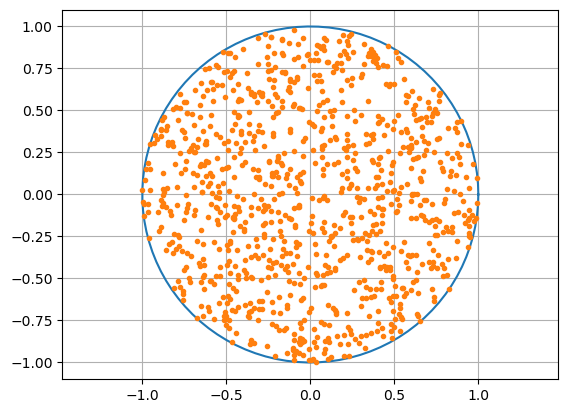

In [27]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
r = np.random.uniform(low=0, high=1, size=n)  # radius
theta = np.random.uniform(low=0, high=2*np.pi, size=n)  # angle

# Polar coordinates transformation
x = np.sqrt(r) * np.cos(theta) # Cos theta of a line in 2d inside a cricle gives the line's distance with respect to x axis
y = np.sqrt(r) * np.sin(theta)

# make the line
a = np.linspace(0, 2*np.pi, 100)
# perform a transformation to do a circle
cx,cy = np.cos(a), np.sin(a)

fg, ax = plt.subplots(1, 1)
ax.plot(cx, cy,'-') # draw unit circle line
ax.plot(x, y, '.') # plot random points
ax.axis('equal')
ax.grid(True)
fg.canvas.draw()
plt.show()

Now let's look at R:

In [28]:
r = np.sqrt(x**2 + y**2)

Check histogram of R

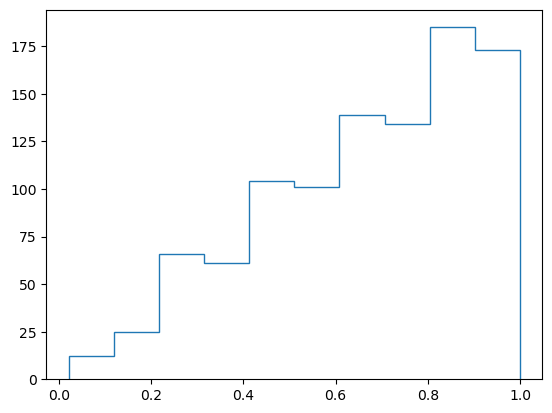

In [31]:
counts, bins = np.histogram(r)
plt.stairs(counts, bins)
plt.show()

Check the PMF and CDF; Use the Utils script to make and plot the empirical distribution

In [32]:
from Utils import makeEDF, plotEDF


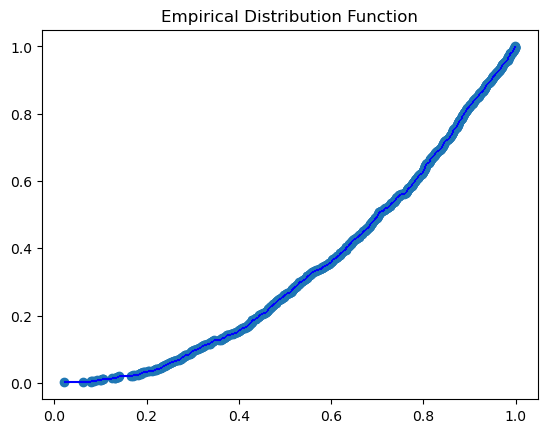

In [33]:
my_edf = makeEDF(r)
my_edf

plotEDF(my_edf)

In [34]:
r.mean()

np.float64(0.6664087603537766)

Some work with text parsing

In [6]:
csv_file = open('breast_cancer.csv', 'r')

# read the whole data line by line
all_lines = csv_file.readlines()

# obtain a list, each element of which is a single line from the imported csv file 

all_lines



FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer.csv'

In [21]:
all_lines[0]

'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst\n'

We see that there is a line break in the end, how to get rid of it?

In [22]:
all_lines[0].strip()

'id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst'